In [1]:
# Data manipulation
import pandas as pd # data manipulation and dataframes
import numpy as np # arrays manipulation and mathematical operations

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime
from datetime import datetime

# Te quiero demasiado
from tqdm import tqdm

In [54]:
# Reads csvs
initial = pd.read_csv('../eda/initial.csv', index_col = 0) #2021-03-06 #2022-08-18
scraped = pd.read_csv('../eda/scraped.csv', index_col = 0) # 2023-07-10

scraped['hue'] = 'scraped'
initial['hue'] = 'initial'

scraped.drop(scraped[scraped['category'] == 'solidario'].index, inplace = True)
scraped.drop(scraped[scraped['category'] == 'navidad'].index, inplace = True)
scraped.drop(scraped[scraped['category'] == 'internacional'].index, inplace = True)

initial.drop(initial[initial['category'] == 'solidario'].index, inplace = True)
initial.drop(initial[initial['category'] == 'navidad'].index, inplace = True)
initial.drop(initial[initial['category'] == 'internacional'].index, inplace = True)

initial.dropna(axis=0, inplace=True)

frames = [initial, scraped]
concatenation = pd.concat(frames)

unique_dates = concatenation['insert_date'].unique();
unique_categories = concatenation['category'].unique();

In [64]:
mean_21_22 = sum(initial['price']) / len(initial['price'])
mean_23 = sum(scraped['price']) / len(scraped['price'])

In [67]:
mean_23

3.3987446878065395

In [68]:
mean_21_22

3.3995017183828096

In [69]:
mean_price_evolution = {'dates': [], 'mean_prices': []}

for d in tqdm(unique_dates):
    mean_price_evolution['dates'].append(d)
    mean_price_evolution['mean_prices'].append(concatenation[concatenation['insert_date'] == d]['price'].mean())

100%|██████████| 532/532 [01:31<00:00,  5.80it/s]


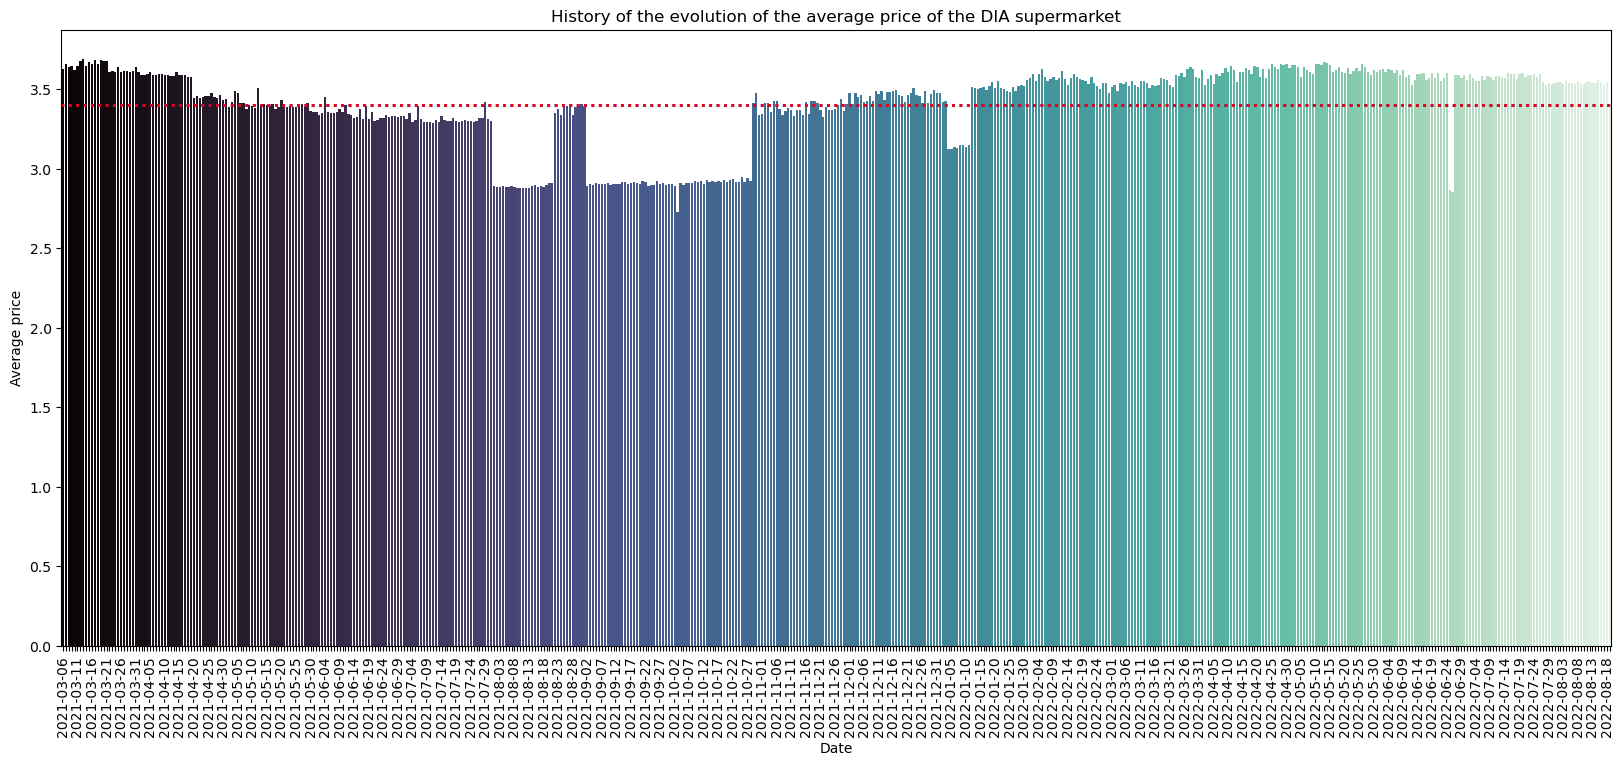

In [73]:
plt.figure(figsize =(20,8))

bar_plot = sns.barplot(x = mean_price_evolution['dates'], y = mean_price_evolution['mean_prices'], palette= "mako")

plt.title('History of the evolution of the average price of the DIA supermarket')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.xticks(rotation=90);

plt.axhline(mean_21_22, color='blue', linewidth=2, linestyle='dotted')
plt.axhline(mean_23, color='red', linewidth=2, linestyle='dotted')

for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.show()

In [56]:
mean_price_by_categories = {'categories': [], 'mean_prices': []}

for c in tqdm(unique_categories):
    mean_price_by_categories['categories'].append(c)
    mean_price_by_categories['mean_prices'].append(initial[initial['category'] == c]['price'].mean())

100%|██████████| 23/23 [00:03<00:00,  5.85it/s]


In [57]:
mean_price_by_categories2 = {'categories': [], 'mean_prices': []}

for c in tqdm(unique_categories):
    mean_price_by_categories2['categories'].append(c)
    mean_price_by_categories2['mean_prices'].append(scraped[scraped['category'] == c]['price'].mean())

100%|██████████| 23/23 [00:00<00:00, 727.21it/s]


In [58]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

df1['mean_prices'] = mean_price_by_categories['mean_prices']
df1['category'] = mean_price_by_categories['categories']
df1['hue'] = 'initial'

df2['mean_prices'] = mean_price_by_categories2['mean_prices']
df2['category'] = mean_price_by_categories2['categories']
df2['hue'] = 'scraped'

frames = [df1, df2]
df12 = pd.concat(frames)



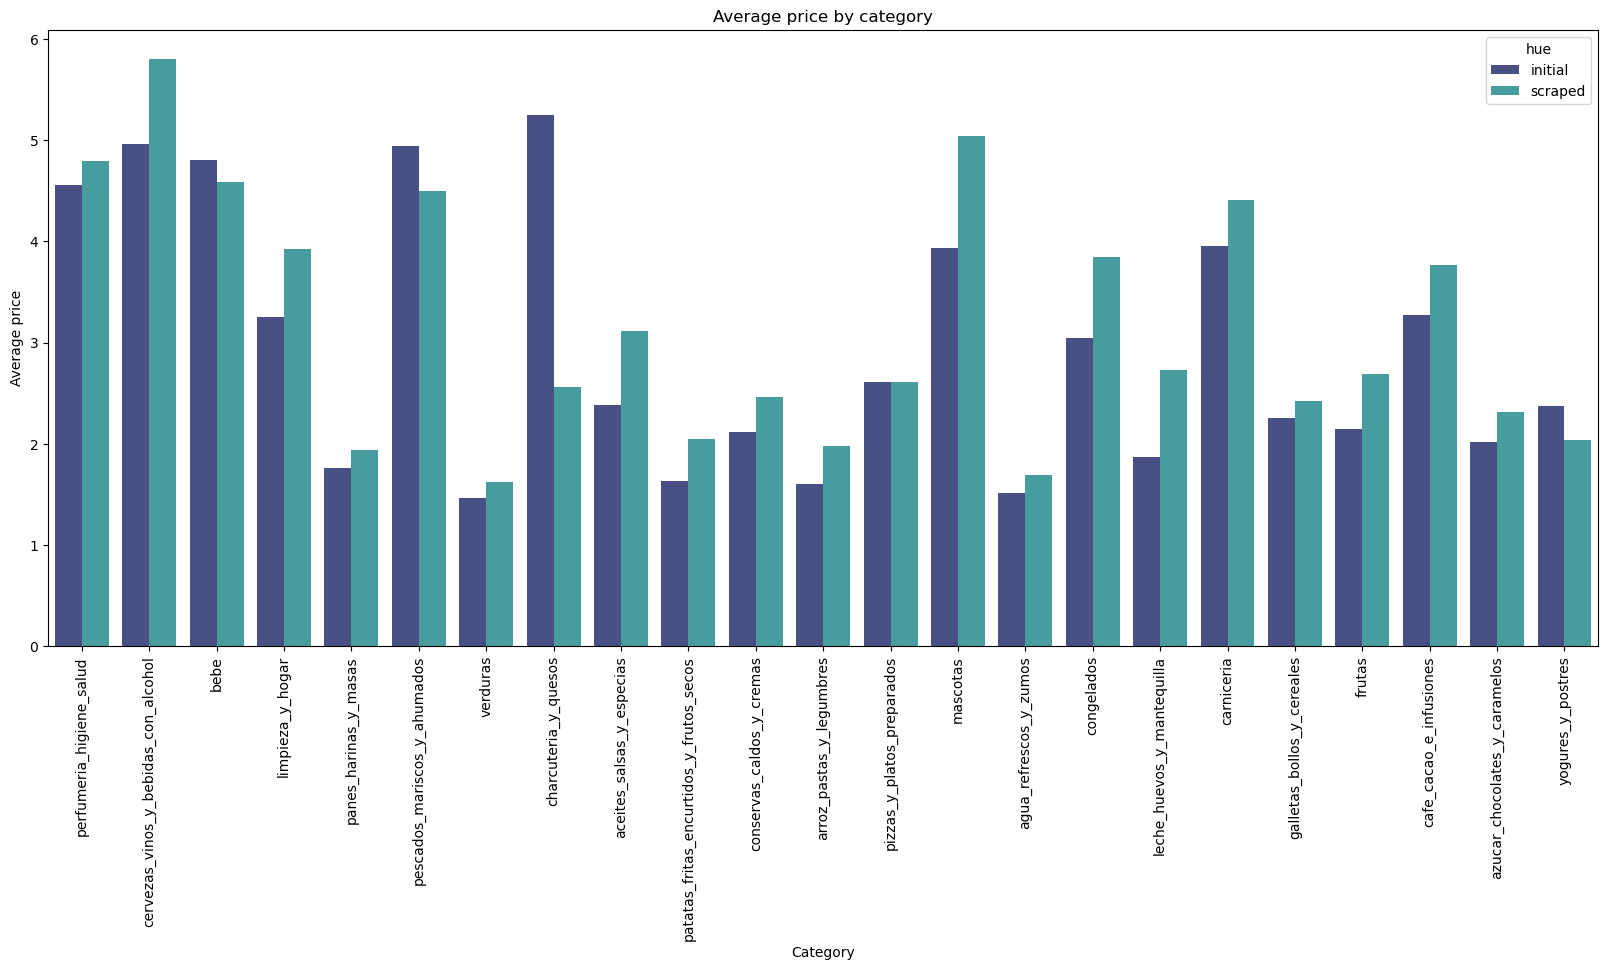

In [59]:
plt.figure(figsize =(20,8))

sns.barplot(df12, x = 'category', y = 'mean_prices', hue = 'hue', palette= "mako")

#sns.barplot(x = mean_price_by_categories['categories'], y = mean_price_by_categories['mean_prices'], hue = 'hue', palette= "mako")

plt.title('Average price by category')
plt.xlabel('Category')
plt.ylabel('Average price')
plt.xticks(rotation=90);

In [74]:
price_evolution_expensive_categories = {'dates': [], 'mean_prices': []}

for d in tqdm(unique_dates):
    price_evolution_expensive_categories['dates'].append(d)
    price_evolution_expensive_categories['mean_prices'].append(concatenation[(concatenation['insert_date'] == d) & (concatenation['category'] == 'charcuteria_y_quesos')]['price'].mean())

100%|██████████| 532/532 [02:53<00:00,  3.07it/s]


/var/folders/q3/mvdqcsqd66g2sjy7y39hmm7c0000gn/T/ipykernel_5280/1961128866.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line_plot = sns.lineplot(x = price_evolution_expensive_categories['dates'],


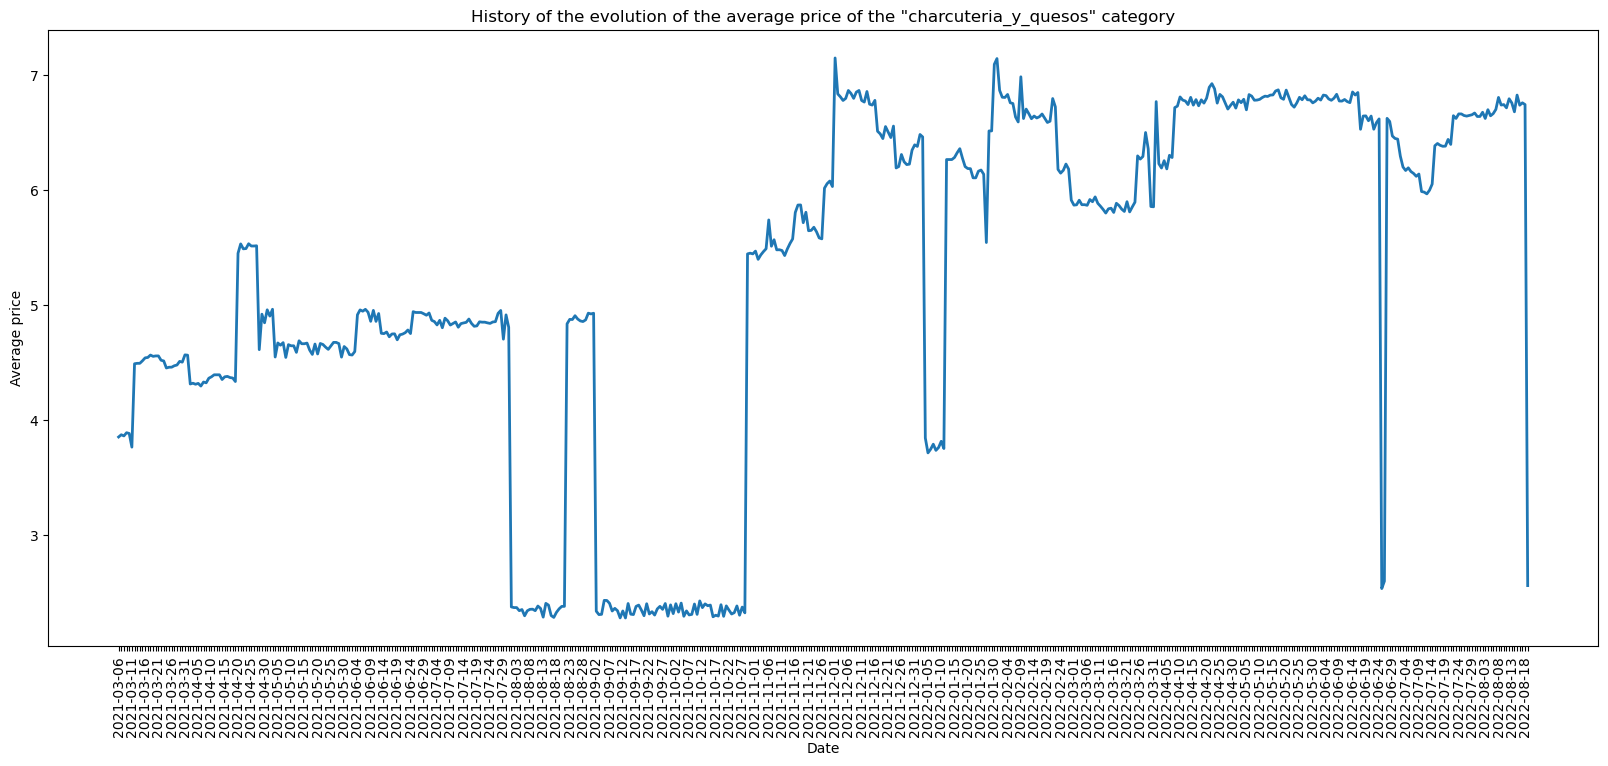

In [81]:
plt.figure(figsize =(20,8))


line_plot = sns.lineplot(x = price_evolution_expensive_categories['dates'], 
             y = price_evolution_expensive_categories['mean_prices'], 
             linewidth = 2, 
             palette= "mako")

plt.title('History of the evolution of the average price of the "charcuteria_y_quesos" category')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.xticks(rotation=90);

for index, label in enumerate(line_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
      
plt.show()

In [78]:
price_evolution_expensive_categories2 = {'dates': [], 'mean_prices': []}

for d in tqdm(unique_dates):
    price_evolution_expensive_categories2['dates'].append(d)
    price_evolution_expensive_categories2['mean_prices'].append(concatenation[(concatenation['insert_date'] == d) & (concatenation['category'] == 'cervezas_vinos_y_bebidas_con_alcohol')]['price'].mean())

100%|██████████| 532/532 [02:59<00:00,  2.97it/s]


In [77]:
concatenation['category'].unique()

array(['perfumeria_higiene_salud', 'cervezas_vinos_y_bebidas_con_alcohol',
       'bebe', 'limpieza_y_hogar', 'panes_harinas_y_masas',
       'pescados_mariscos_y_ahumados', 'verduras', 'charcuteria_y_quesos',
       'aceites_salsas_y_especias',
       'patatas_fritas_encurtidos_y_frutos_secos',
       'conservas_caldos_y_cremas', 'arroz_pastas_y_legumbres',
       'pizzas_y_platos_preparados', 'mascotas', 'agua_refrescos_y_zumos',
       'congelados', 'leche_huevos_y_mantequilla', 'carniceria',
       'galletas_bollos_y_cereales', 'frutas', 'cafe_cacao_e_infusiones',
       'azucar_chocolates_y_caramelos', 'yogures_y_postres'], dtype=object)

/var/folders/q3/mvdqcsqd66g2sjy7y39hmm7c0000gn/T/ipykernel_5280/1402536598.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line_plot = sns.lineplot(x = price_evolution_expensive_categories2['dates'],


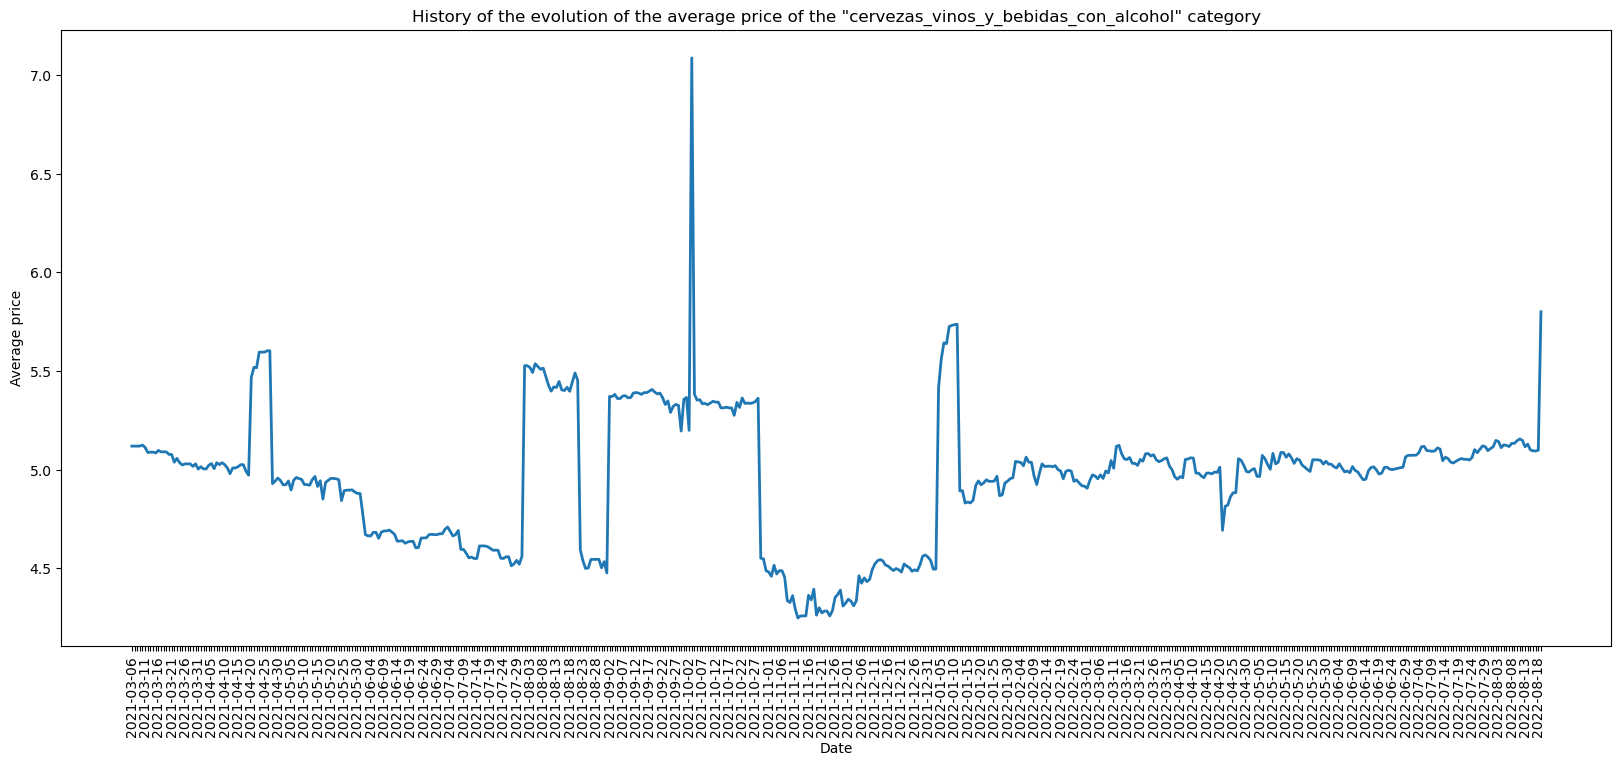

In [82]:
plt.figure(figsize =(20,8))


line_plot = sns.lineplot(x = price_evolution_expensive_categories2['dates'], 
             y = price_evolution_expensive_categories2['mean_prices'], 
             linewidth = 2, 
             palette= "mako")

plt.title('History of the evolution of the average price of the "cervezas_vinos_y_bebidas_con_alcohol" category')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.xticks(rotation=90);

for index, label in enumerate(line_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
      
plt.show()

In [83]:
price_evolution_expensive_categories3 = {'dates': [], 'mean_prices': []}

for d in tqdm(unique_dates):
    price_evolution_expensive_categories3['dates'].append(d)
    price_evolution_expensive_categories3['mean_prices'].append(concatenation[(concatenation['insert_date'] == d) & (concatenation['category'] == 'mascotas')]['price'].mean())

100%|██████████| 532/532 [02:51<00:00,  3.10it/s]


In [ ]:
plt.figure(figsize =(20,8))


line_plot = sns.lineplot(x = price_evolution_expensive_categories3['dates'], 
             y = price_evolution_expensive_categories3['mean_prices'], 
             linewidth = 2, 
             palette= "mako")

plt.title('History of the evolution of the average price of the "mascotas" category')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.xticks(rotation=90);

for index, label in enumerate(line_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
      
plt.show()